# Classification Model Training and Evaluations for Titanic Dataset

In this notebook, we will use train some models, and use them for classification on Titanic dataset. Starting from Logistic Regression, we will use Ridge and Lasso Regression, kNN classification, Bayes classification, Linear & Polynomial & Gaussian SVM, Decision Tree, Random Forest and AdaBoost.

After that, we will print their scores for performance evaluation, and make a comparison between them. That's how we get a chance for selecting the best one.

Firstly, let's import the <code>train</code> dataset and print the first 5 columns of it.

In [1]:
# for the train data
import pandas as pd
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We are imported our train dataset. Now, we will import our test dataset.

In [2]:
# for the test data
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Now, let's review the datasets. We will look at the <code>infos</code> and <code>shapes</code> of the datasets.

In [3]:
# infos from datasets
print(f'Shape is {train_data.shape} for train dataset.\nShape is {test_data.shape} for test dataset.')

Shape is (891, 12) for train dataset.
Shape is (418, 11) for test dataset.


Test dataset has one missing column, because it is our target variable. We will create our classification models from the train dataset, after that we will test them on the test dataset. We will write our predictions into <code>submission</code> file, and evaluate our scores.

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


After info codes, we gathered some useful informations from our datas. So, we learned a lot about our datasets. One last thing left before starting to <code>data preprocessing</code>.

Let's control if there is a missing value in both of our datasets.

In [6]:
print('For our feature data set:\n{}'.format(train_data.isnull().sum()))
print('\n************\n\n''For our test data set:\n{}'.format(test_data.isnull().sum()))

For our feature data set:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

************

For our test data set:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


As you can see, we have some missing values in <code>Age</code>, <code>Cabin</code>, and <code>Embarked</code> columns. Let's continue to the <code>data preprocessing</code> to create ideas for solving these problems.

## Data Preprocessing

In this part, we will create our preprocessing methods.

* For <code>Age</code> column, we will get the mean of this column, and fulfill the empty columns with it.
* <code>Sex</code> column has text values, but we need numerical values. We will encode male as 0, female as 1.
* For <code>Embarked</code> column's empty rows, we will use k-nearest neighbor to fulfill. After that we encode it like C=1, Q=2, S=3.
* Just for test dataset, we can give mean of the column to <code>Fare</code> column, because there is a missing value in it.
* We do not use columns like <code>Cabin</code>, <code>Name</code>, <code>PassengerId</code>.
    * <code>Name</code> is not important thing to use in data mining project.
    * <code>Cabin</code> has lots of missing values.
    * We cannot mine anything with <code>PassengerId</code>.

Let's do the preprocessing of both of datasets.

For the training dataset, we need to introduce a <code>y_train</code> variable to hide our target variable from the models we will create.

After the creation of our models, we use <code>StandardScaler</code> to improve performance of the models. We will see its effect later of this notebook.

In [7]:
# for training dataset
y_train_data = train_data['Survived']
feature_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X_train_data = train_data[feature_cols]

X_train_data.loc[:, 'Age'] = X_train_data['Age'].fillna(int(X_train_data['Age'].mean()))
X_train_data.loc[:, 'Sex'] = X_train_data['Sex'].map({'male': 0, 'female': 1})
X_train_data.loc[:, 'Embarked'] = X_train_data['Embarked'].map({'C': 1, 'Q': 2, 'S': 3})

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights='uniform')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train_data[['Embarked']]), columns=['Embarked'])
X_train_data.loc[:, 'Embarked'] = X_train_imputed['Embarked']
X_train_data.loc[:, 'Embarked'] = X_train_data['Embarked'].astype(int)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_data)

print('Data preprocessing for the training dataset is successful!')

Data preprocessing for the training dataset is successful!


For test dataset, it is unrequired to create a <code>y</code> variable, because there is no <code>Survived</code> column in this dataset, which is our target variable. This information is hidden in <code>submission.csv</code> on Titanic project. So, we do not need to create a <code>y</code> variable here.

Also, we do not need to use kNN imputer for <code>Embarked</code> column, because it does not have any missing value.

In [8]:
# for the test dataset
y_test_data = None
feature_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X_test_data = test_data[feature_cols]

X_test_data.loc[:, 'Age'] = X_test_data['Age'].fillna(int(X_test_data['Age'].mean()))
X_test_data.loc[:, 'Fare'] = X_test_data['Fare'].fillna(int(X_test_data['Fare'].mean()))
X_test_data.loc[:, 'Sex'] = X_test_data['Sex'].map({'male': 0, 'female': 1})
X_test_data.loc[:, 'Embarked'] = X_test_data['Embarked'].map({'C': 1, 'Q': 2, 'S': 3})

X_test_scaled = scaler.transform(X_test_data)

print('Data preprocessing for the test dataset is successful!')

Data preprocessing for the test dataset is successful!


We should call the <code>head</code> to see if the things we changed are applied on datasets.

In [9]:
X_train_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,3
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,3
3,1,1,35.0,1,0,53.1000,3
4,3,0,35.0,0,0,8.0500,3


In [10]:
X_test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,3
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,3
4,3,1,22.0,1,1,12.2875,3


As you can see above, we are done with our <code>data preprocessing</code> part. Let's continue with <code>Logistic Regression</code>.

## Logistic Regression

The first model we will train is <code>Logistic Regression</code>. We will learn from train dataset, predict on test dataset, and compare with submission dataset to evaluate our model's performance. We will do this technique for all of our models in this project.

Here, we will try lots of parameters, and the best one will be printed with its <code>accuracy</code>, <code>AUC</code>, <code>recall</code>, <code>AUC</code>, <code>confusion matrix</code> values.

Let's start with the required imports before our Logistic Regression model.

In [11]:
# imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, roc_auc_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV

print('Success.')

Success.


For one last thing, let's get the submission dataset. It carries the <code>target</code> variables of our test dataset.

In [12]:
# submission dataset
submission_data = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")
y_submission = submission_data['Survived']

print('Success.')

Success.


Right now, we will search the best <code>C</code> parameter for our <code>Logistic Regression</code> model. For this purpose, we will use <code>GridSearchCV</code> which uses <code>k-fold cross validation</code> to find the best parameters. Our k will be 5. Let's continue.

In [19]:
# logistic regression
model = LogisticRegression()

# parameters
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# gridsearchcv
grid_search_logreg = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_logreg.fit(X_train_scaled, y_train_data)

# the best parameters
print("The best parameters:", grid_search.best_params_)

The best parameters: {'C': 0.01}


Let's train the <code>Logistic Regression</code> model. We will also see a <code>confusion matrix</code> plot at the end of output. For train-test dataset together, our Logistic Regression model will be like this.

We will use the <code>C = 0.01</code> parameter here also.

Accuracy: 0.9473684210526315
Recall: 0.9078947368421053
AUC: 0.9389097744360902
Confusion Matrix:
 [[258   8]
 [ 14 138]]


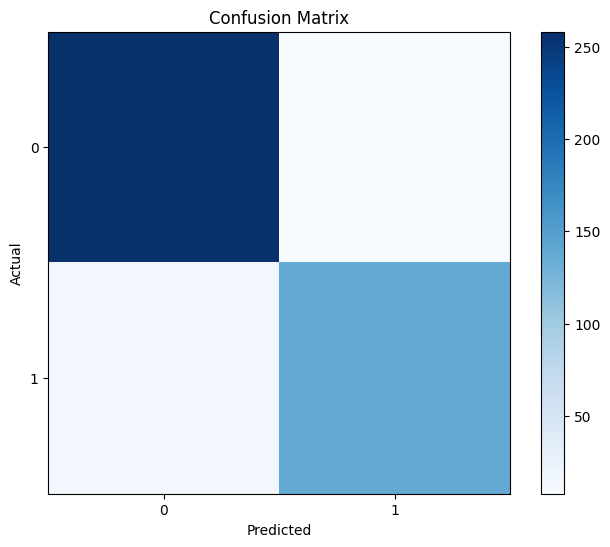

In [22]:
# logistic regression
logreg = LogisticRegression(C=grid_search_logreg.best_params_['C'])
logreg.fit(X_train_scaled, y_train_data)
y_pred = logreg.predict(X_test_scaled)

# calculate the values for the model we created
accuracy_logreg1 = accuracy_score(y_submission, y_pred)
recall_logreg1 = recall_score(y_submission, y_pred)
auc_logreg1 = roc_auc_score(y_submission, y_pred)

# print the values
print(f"Accuracy: {accuracy_logreg1}")
print(f"Recall: {recall_logreg1}")
print(f"AUC: {auc_logreg1}")

# create the confusion matrix and show it on plot
cm_logreg1 = confusion_matrix(y_submission, y_pred)
print('Confusion Matrix:\n', cm)
plt.figure(figsize=(8, 6))
plt.imshow(cm_logreg1, interpolation='nearest', cmap='Blues')
plt.colorbar()
plt.xticks(np.arange(len(np.unique(y_submission))), np.unique(y_submission))
plt.yticks(np.arange(len(np.unique(y_submission))), np.unique(y_submission))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

For train dataset, we will be get a <code>Logistic Regression</code> model below. Here, we will use just train dataset, and we will compare our <code>Logistic Regression</code> models.

We find its <code>test_size</code> and <code>random_state</code> parameters from intervals we create. This <code>Logistic Regression</code> model is the best one in this interval.

After <code>Logistic Regression</code>, we will use these values in all <code>train_test_split</code> parts -our just train dataset models.

The best Parameters: {'random_state': 45, 'test_size': 0.15000000000000002}
The best Accuracy: 0.8805970149253731
The best Recall: 0.7777777777777778
The best AUC: 0.8551810237203495
The best Confusion Matrix:
[[83  6]
 [10 35]]


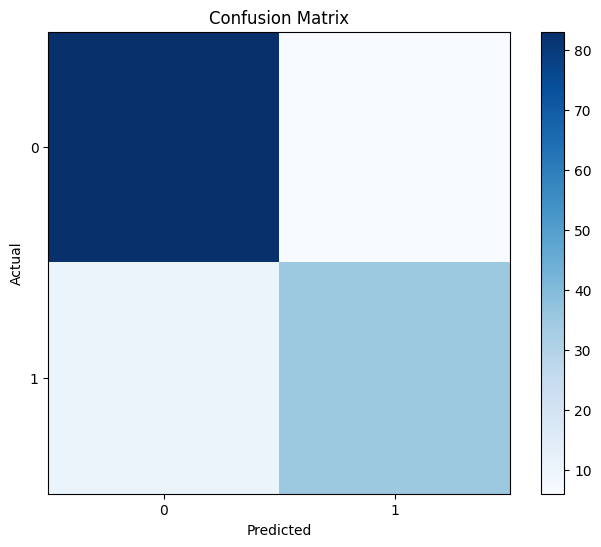

In [50]:
# logistic regression
best_score = 0
best_params = {}

# create the ranges
random_states = range(1, 101)
test_sizes = np.arange(0.1, 0.5, 0.05)

for random_state in random_states:
    for test_size in test_sizes:
        # split the data set
        X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, y_train_data, test_size=test_size, random_state=random_state)

        # logistic regression
        logreg = LogisticRegression(C=grid_search_logreg.best_params_['C'])
        logreg.fit(X_train, y_train)
        y_pred = logreg.predict(X_test)

        # calculate the values for the model we created
        accuracy_logreg2 = accuracy_score(y_test, y_pred)
        recall_logreg2 = recall_score(y_test, y_pred)
        auc_logreg2 = roc_auc_score(y_test, y_pred)
        cm_logreg2 = confusion_matrix(y_test, y_pred)

        # find the best values
        if accuracy_logreg2 > best_score:
            best_score = accuracy_logreg2
            best_params_logreg2 = {'random_state': random_state, 'test_size': test_size}
            best_recall = recall_logreg2
            best_auc = auc_logreg2
            best_cm = cm_logreg2

# print the best values
print(f"The best Parameters: {best_params_logreg2}")
print(f"The best Accuracy: {best_score}")
print(f"The best Recall: {best_recall}")
print(f"The best AUC: {best_auc}")
print(f"The best Confusion Matrix:\n{best_cm}")

plt.figure(figsize=(8, 6))
plt.imshow(best_cm, interpolation='nearest', cmap='Blues')
plt.colorbar()
plt.xticks(np.arange(len(np.unique(y_test))), np.unique(y_test))
plt.yticks(np.arange(len(np.unique(y_test))), np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

We trained a powerful <code>Logistic Regression</code> model here! As you can see, it predicted the <code>submission</code> values very well!

But the most powerful one is the one that tries to predict test dataset values.

Last of all, for our train dataset models, we will use this parameters.

## Ridge and Lasso Regression

Here, we will use both of <code>Ridge and Lasso</code> Regression as a classificator. First, let's do the required imports

In [29]:
# imports
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import KFold

print('Success.')

Success.


So, we are ready to start. We will use <code>GridResearchCV</code> with 5 k-fold for finding the best alpha parameters for the model we will create.

In [31]:
# parameter interval
alpha_range_ridge = np.arange(0.05, 1.0, 0.05)
alpha_range_lasso = np.arange(0.01, 1.0, 0.01)

# k-fold cross validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# finding the best parameters
ridge_grid = GridSearchCV(Ridge(), {'alpha': alpha_range_ridge}, cv=kfold)
ridge_grid.fit(X_train_scaled, y_train_data)
best_alpha_ridge = ridge_grid.best_params_['alpha']

lasso_grid = GridSearchCV(Lasso(), {'alpha': alpha_range_lasso}, cv=kfold)
lasso_grid.fit(X_train_scaled, y_train_data)
best_alpha_lasso = lasso_grid.best_params_['alpha']

print("The best alpha value (Ridge):", best_alpha_ridge)
print("The best alpha value (Lasso):", best_alpha_lasso)

The best alpha value (Ridge): 0.9500000000000001
The best alpha value (Lasso): 0.01


As you can see, 95% alpha is good for Ridge and 1% is good for Lasso's alpha parameter.

In [32]:
ridge_model = Ridge(alpha=best_alpha_ridge)
ridge_model.fit(X_train_scaled, y_train_data)
y_ridge_pred_proba = ridge_model.predict(X_test_scaled)

lasso_model = Lasso(alpha=best_alpha_lasso)
lasso_model.fit(X_train_scaled, y_train_data)
y_lasso_pred_proba = lasso_model.predict(X_test_scaled)

# classify predictions based on a threshold
y_ridge_pred = (y_ridge_pred_proba > 0.5).astype(int)
y_lasso_pred = (y_lasso_pred_proba > 0.5).astype(int)

accuracy_ridge1 = accuracy_score(y_submission, y_ridge_pred)
auc_ridge1 = roc_auc_score(y_submission, y_ridge_pred_proba)
recall_ridge1 = recall_score(y_submission, y_ridge_pred)

accuracy_lasso1 = accuracy_score(y_submission, y_lasso_pred)
auc_lasso1 = roc_auc_score(y_submission, y_lasso_pred_proba)
recall_lasso1 = recall_score(y_submission, y_lasso_pred)

print(f"Ridge Accuracy: {accuracy_ridge1}, Ridge AUC: {auc_ridge1}, Ridge Recall: {recall_ridge1}")
print(f"Lasso Accuracy: {accuracy_lasso1}, Lasso AUC: {auc_lasso1}, Lasso Recall: {recall_lasso1}")

Ridge Accuracy: 0.9641148325358851, Ridge AUC: 0.9933715868618915, Ridge Recall: 0.9605263157894737
Lasso Accuracy: 0.9808612440191388, Lasso AUC: 0.9972051840126632, Lasso Recall: 0.9736842105263158


For train-test dataset together, we will create our model like this. Right now, we use just our train dataset. We will do it for all of our next models. We get the <code>train_test_split</code> parameters from the results of our train Logistic Regression (we do it for every just-train dataset model).

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, y_train_data, test_size=best_params_logreg2['test_size'], random_state=best_params_logreg2['random_state'])

ridge_model = Ridge(alpha=best_alpha_ridge)
ridge_model.fit(X_train, y_train)
y_ridge_pred_proba = ridge_model.predict(X_test)

lasso_model = Lasso(alpha=best_alpha_lasso)
lasso_model.fit(X_train, y_train)
y_lasso_pred_proba = lasso_model.predict(X_test)

# classify predictions based on a threshold

y_ridge_pred = (y_ridge_pred_proba > 0.5).astype(int)
y_lasso_pred = (y_lasso_pred_proba > 0.5).astype(int)

accuracy_ridge2 = accuracy_score(y_test, y_ridge_pred)
auc_ridge2 = roc_auc_score(y_test, y_ridge_pred_proba)
recall_ridge2 = recall_score(y_test, y_ridge_pred)

accuracy_lasso2 = accuracy_score(y_test, y_lasso_pred)
auc_lasso2 = roc_auc_score(y_test, y_lasso_pred_proba)
recall_lasso2 = recall_score(y_test, y_lasso_pred)

print(f"Ridge Accuracy: {accuracy_ridge2}, Ridge AUC: {auc_ridge2}, Ridge Recall: {recall_ridge2}")
print(f"Lasso Accuracy: {accuracy_lasso2}, Lasso AUC: {auc_lasso2}, Lasso Recall: {recall_lasso2}")

Ridge Accuracy: 0.8656716417910447, Ridge AUC: 0.885518102372035, Ridge Recall: 0.7777777777777778
Lasso Accuracy: 0.8656716417910447, Lasso AUC: 0.8887640449438201, Lasso Recall: 0.7777777777777778


With the best alpha values we found above, our <code>Ridge and Lasso</code> classificators show us wonderful performance on our <code>submission</code> dataset. Our test was so successful.

The best model was the one for test dataset. Let's continue with the <code>kNN</code>.

## K-Nearest Neighbor Classifier

For <code>kNN</code>, we will select our parameters with help of the <code>Elbow</code> method. From <code>Elbow</code> plot, we will select the best <code>k</code> with the best accuracy value.

Let's import what we required before this section.

In [45]:
# imports
from sklearn.neighbors import KNeighborsClassifier

print('Succes.')

Succes.


Let's look at the <code>Elbow</code> and select the best k value.

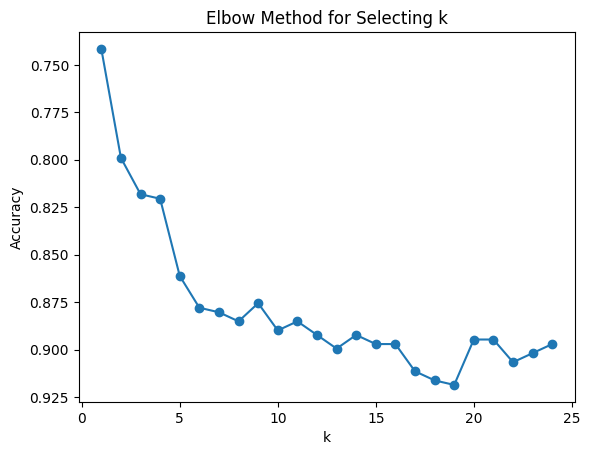

In [46]:
# elbow method for k value
k_values = range(1, 25)

# save the k values
accuracy_scores = []

# train for every k value
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train_scaled, y_train_data)
    y_pred = knn_classifier.predict(X_test_scaled)
    accuracy = accuracy_score(y_submission, y_pred)
    accuracy_scores.append(accuracy)

# create the plot
plt.plot(list(k_values), accuracy_scores, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Elbow Method for Selecting k')
plt.gca().invert_yaxis()
plt.show()

As you can see above, <code>Elbow</code> point is 19. It means that the best <code>k</code> value is 19 for this test size. Let's select <code>k = 19</code> and train our kNN classification model for our model with train-test datasets.

Accuracy: 0.9186602870813397
AUC: 0.9149436090225563
Recall: 0.9013157894736842
Confusion Matrix:
[[247  19]
 [ 15 137]]


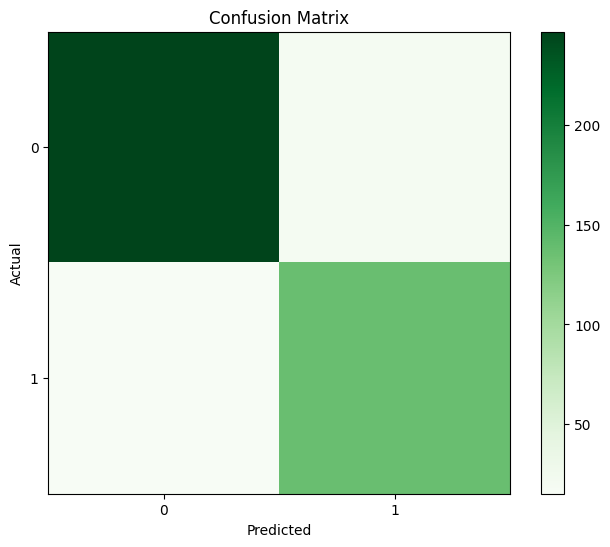

In [48]:
# create knn classification model
k = 19
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train_scaled, y_train_data)

# test on test dataset
y_pred = knn_classifier.predict(X_test_scaled)

# evaluate the performance of the model
accuracy_knn1 = accuracy_score(y_submission, y_pred)
cm_knn1 = confusion_matrix(y_submission, y_pred)
auc_knn1 = roc_auc_score(y_submission, y_pred)
recall_knn1 = recall_score(y_submission, y_pred)

print("Accuracy:", accuracy_knn1)
print("AUC:", auc_knn1)
print("Recall:", recall_knn1)
print("Confusion Matrix:")
print(cm_knn1)

# plot of confusion matrix
cm = confusion_matrix(y_submission, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm_knn1, interpolation='nearest', cmap='Greens')
plt.colorbar()
plt.xticks(np.arange(len(np.unique(y_submission))), np.unique(y_submission))
plt.yticks(np.arange(len(np.unique(y_submission))), np.unique(y_submission))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Split and let's do it for the train dataset. K value will come from <code>Elbow</code> again.

Accuracy: 0.8880597014925373
AUC: 0.8662921348314607
Recall: 0.8
Confusion Matrix:
[[83  6]
 [ 9 36]]


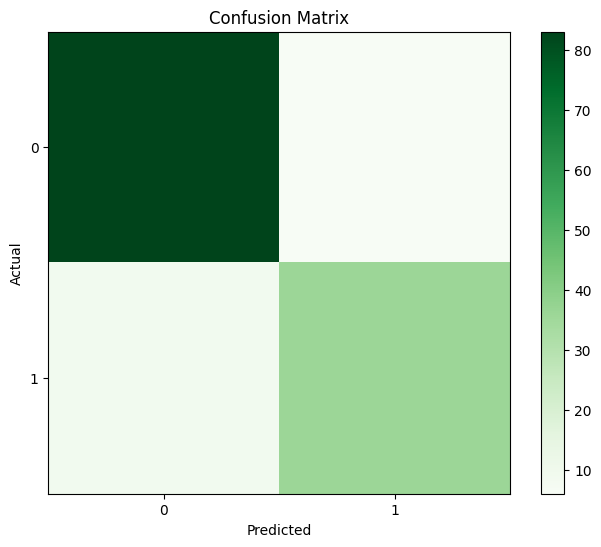

In [49]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, y_train_data, test_size=best_params_logreg2['test_size'], random_state=best_params_logreg2['random_state'])

# create knn classification model
k = 19
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

# test on test dataset
y_pred = knn_classifier.predict(X_test)

# evaluate the performance of the model
accuracy_knn2 = accuracy_score(y_test, y_pred)
cm_knn2 = confusion_matrix(y_test, y_pred)
auc_knn2 = roc_auc_score(y_test, y_pred)
recall_knn2 = recall_score(y_test, y_pred)

print("Accuracy:", accuracy_knn2)
print("AUC:", auc_knn2)
print("Recall:", recall_knn2)
print("Confusion Matrix:")
print(cm_knn2)

# plot of confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm_knn2, interpolation='nearest', cmap='Greens')
plt.colorbar()
plt.xticks(np.arange(len(np.unique(y_test))), np.unique(y_test))
plt.yticks(np.arange(len(np.unique(y_test))), np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

As you can see above, we've got higher accuracy in our train-test dataset model. It is more powerful than the second model -just train dataset model. Let's continue with <code>Bayes</code> classification.

## Bayes Classification

Our target variable <code>Survived</code> column carries 0-1 values, so <code>Bernoulli Naive Bayes</code> classificator suits our idea. So, we will use it for this part. Make the import first.

In [53]:
# imports
from sklearn.naive_bayes import BernoulliNB
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

print('Success.')

Success.


So, it is the time to find the best parameters for <code>Bernoulli Naive Bayes</code>. After that we can start. Here, we will use <code>RandomizedSearchCV</code> to find these values.

In [56]:
# bernoulli naive bayes
bnb = BernoulliNB()

# the parameters
param_dist = {'alpha': [0.1, 0.5, 1.0],
              'binarize': [0.0, 0.5, 1.0],
              'fit_prior': [True, False]}

# randomizesearchcv
random_search_bayes = RandomizedSearchCV(bnb, param_dist, cv=5, scoring='accuracy', n_iter=10)
random_search_bayes.fit(X_train_scaled, y_train_data)

print("The best parameters:", random_search_bayes.best_params_)

# use of the best parameters
best_alpha_bayes = random_search_bayes.best_params_['alpha']
best_binarize_bayes = random_search_bayes.best_params_['binarize']
best_fit_prior_bayes = random_search_bayes.best_params_['fit_prior']

The best parameters: {'fit_prior': False, 'binarize': 1.0, 'alpha': 0.1}


Let's continue to the creating our models. First one is our train-test dataset's model.

Accuracy: 0.9617224880382775
AUC: 0.9699248120300752
Recall: 1.0
Confusion Matrix:
 [[250  16]
 [  0 152]]


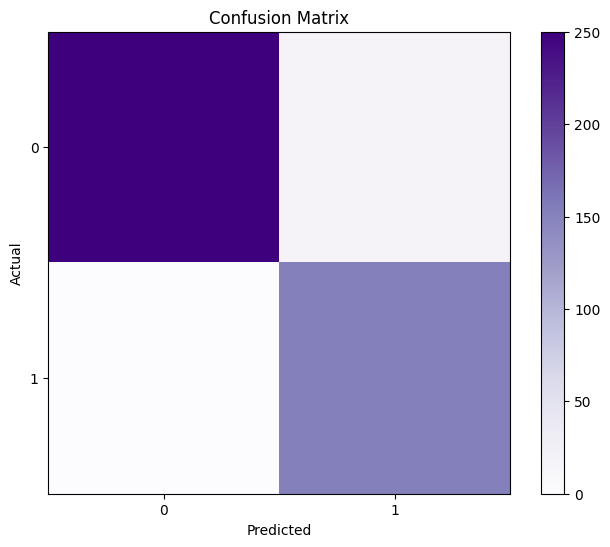

In [57]:
# train bernoulli naive bayes
bnb = BernoulliNB(alpha=best_alpha_bayes, binarize=best_binarize_bayes, fit_prior=best_fit_prior_bayes)
bnb.fit(X_train_scaled, y_train_data)
y_pred = bnb.predict(X_test_scaled)

# evaluate the performance
accuracy_bayes1 = accuracy_score(y_submission, y_pred)
auc_bayes1 = roc_auc_score(y_submission, y_pred)
recall_bayes1 = recall_score(y_submission, y_pred)
cm_bayes1 = confusion_matrix(y_submission, y_pred)

print("Accuracy:", accuracy_bayes1)
print("AUC:", auc_bayes1)
print("Recall:", recall_bayes1)
print("Confusion Matrix:\n", cm_bayes1)

# plot of confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm_bayes1, interpolation='nearest', cmap='Purples')
plt.colorbar()
plt.xticks(np.arange(len(np.unique(y_submission))), np.unique(y_submission))
plt.yticks(np.arange(len(np.unique(y_submission))), np.unique(y_submission))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Let's do it just for our train dataset.

Accuracy: 0.8432835820895522
AUC: 0.8270911360799001
Recall: 0.7777777777777778
Confusion Matrix:
 [[78 11]
 [10 35]]


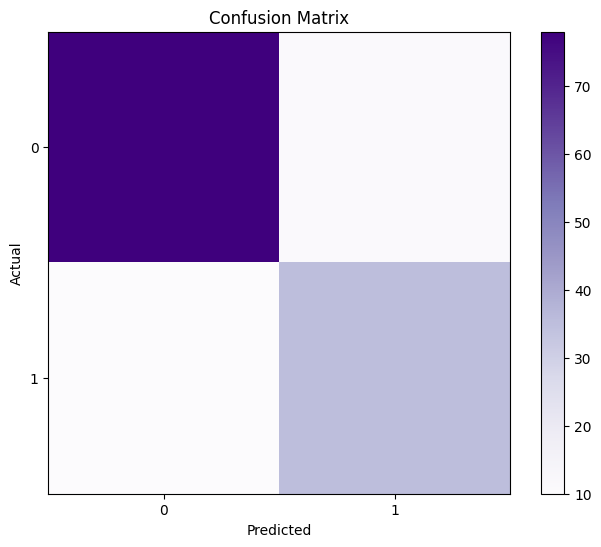

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, y_train_data, test_size=best_params_logreg2['test_size'], random_state=best_params_logreg2['random_state'])

# train bernoulli naive bayes
bnb = BernoulliNB(alpha=best_alpha_bayes, binarize=best_binarize_bayes, fit_prior=best_fit_prior_bayes)
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)

# evaluate the performance
accuracy_bayes2 = accuracy_score(y_test, y_pred)
auc_bayes2 = roc_auc_score(y_test, y_pred)
recall_bayes2 = recall_score(y_test, y_pred)
cm_bayes2 = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy_bayes2)
print("AUC:", auc_bayes2)
print("Recall:", recall_bayes2)
print("Confusion Matrix:\n", cm_bayes2)

# plot of confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm_bayes2, interpolation='nearest', cmap='Purples')
plt.colorbar()
plt.xticks(np.arange(len(np.unique(y_test))), np.unique(y_test))
plt.yticks(np.arange(len(np.unique(y_test))), np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

As you can see, we have very high scores from both of our <code>Bernoulli Naive Bayes</code> classificators. The best one is the one with train-test dataset together. Let's continue with <code>SVM</code> models.

## SVM - Support Vector Machine

In this part of the project, we will work with different kernels for <code>SVM</code>.

### SVM with Linear Kernel

This <code>SVM</code> is one of special types of <code>SVM</code>. Let's start with this kernel. Firstly, for imports, run the cell below. Let's start with testing on our test dataset.

In [59]:
# imports
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict

print('Success.')

Success.


Start with training our train-test model dataset. Do a <code>5-fold cross validation</code> to try blocking overfitting.

Accuracy: 1.0
AUC: 1.0
Recall: 1.0
Confusion Matrix:
 [[266   0]
 [  0 152]]


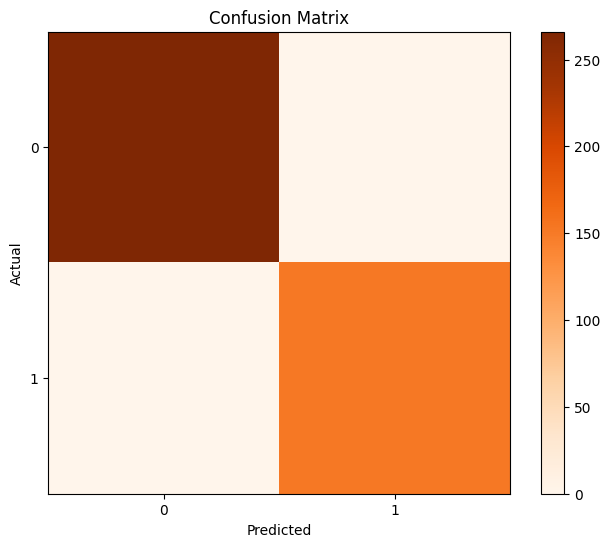

In [64]:
# train the model
svm_classifier = SVC(kernel='linear', C=10)
svm_classifier.fit(X_train_scaled, y_train_data)

# cross-validation
y_pred = cross_val_predict(svm_classifier, X_test_scaled, y_submission, cv=5)

# evaluate performance of model
accuracy_linear_svm1 = accuracy_score(y_submission, y_pred)
auc_linear_svm1 = roc_auc_score(y_submission, y_pred)
recall_linear_svm1 = recall_score(y_submission, y_pred)
cm_linear_svm1 = confusion_matrix(y_submission, y_pred)

print("Accuracy:", accuracy_linear_svm1)
print("AUC:", auc_linear_svm1)
print("Recall:", recall_linear_svm1)
print("Confusion Matrix:\n", cm_linear_svm1)

# plot of confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm_linear_svm1, interpolation='nearest', cmap='Oranges')
plt.colorbar()
plt.xticks(np.arange(len(np.unique(y_train_data))), np.unique(y_train_data))
plt.yticks(np.arange(len(np.unique(y_train_data))), np.unique(y_train_data))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Do it again for the just-train dataset.

Accuracy: 0.8582089552238806
AUC: 0.8383270911360798
Recall: 0.7777777777777778
Confusion Matrix:
 [[80  9]
 [10 35]]


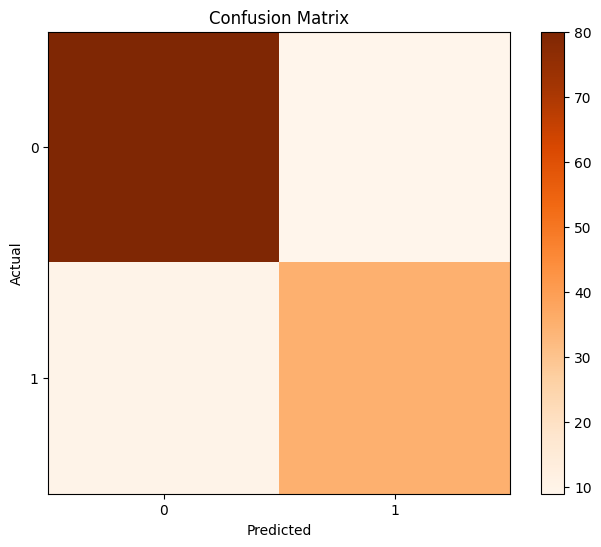

In [65]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, y_train_data, test_size=best_params_logreg2['test_size'], random_state=best_params_logreg2['random_state'])

# train the model
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)

# evaluate the performance of model
accuracy_linear_svm2 = accuracy_score(y_test, y_pred)
auc_linear_svm2 = roc_auc_score(y_test, y_pred)
recall_linear_svm2 = recall_score(y_test, y_pred)
cm_linear_svm2 = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy_linear_svm2)
print("AUC:", auc_linear_svm2)
print("Recall:", recall_linear_svm2)
print("Confusion Matrix:\n", cm_linear_svm2)

# plot of confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm_linear_svm2, interpolation='nearest', cmap='Oranges')
plt.colorbar()
plt.xticks(np.arange(len(np.unique(y_test))), np.unique(y_test))
plt.yticks(np.arange(len(np.unique(y_test))), np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Again, the model using train-test dataset uniform is better. Let's continue with other <code>SVM</code> models with different kernels.

### Polynomial SVM

Let's do the required imports and search with <code>CV</code> for the best polynom degree for this section. First, get the imports.

In [66]:
# imports
from sklearn.model_selection import train_test_split, cross_val_score

print('Success.')

Success.


Let's search for the best <code>degree</code> value.

In [67]:
# polynom degrees
degrees = [1, 2, 3, 4, 5]

# 5-fold cross validation
mean_scores = []
for degree in degrees:
    svm_classifier = SVC(kernel='poly', degree=degree)
    scores = cross_val_score(svm_classifier, X_train_scaled, y_train_data, cv=5)
    mean_scores.append(np.mean(scores))

# find the best degree
best_degree = degrees[np.argmax(mean_scores)]
print("The best degree for polynom:", best_degree)

The best degree for polynom: 2


Let's apply it on our train-test dataset.

Accuracy: 0.9736842105263158
AUC: 0.9736842105263158
Recall: 0.9736842105263158
Confusion Matrix:
 [[259   7]
 [  4 148]]


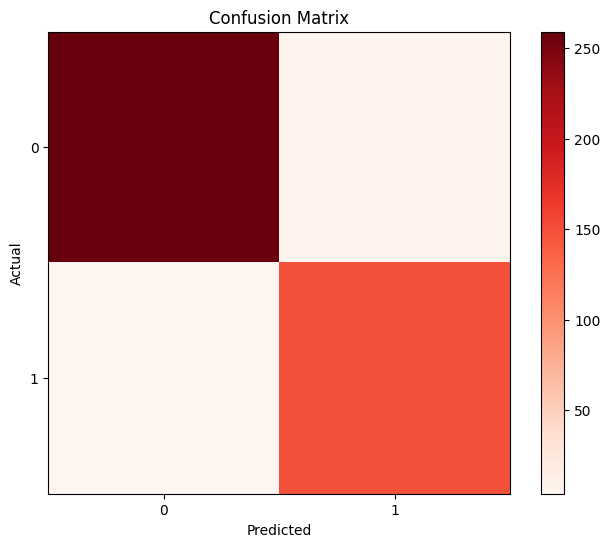

In [68]:
# train the model
svm_classifier = SVC(kernel='poly', degree=best_degree)
svm_classifier.fit(X_train_scaled, y_train_data)
y_pred = svm_classifier.predict(X_test_scaled)

# evaluate the performance of model
accuracy_polynomial_svm1 = accuracy_score(y_submission, y_pred)
auc_polynomial_svm1 = roc_auc_score(y_submission, y_pred)
recall_polynomial_svm1 = recall_score(y_submission, y_pred)
cm_polynomial_svm1 = confusion_matrix(y_submission, y_pred)

print("Accuracy:", accuracy_polynomial_svm1)
print("AUC:", auc_polynomial_svm1)
print("Recall:", recall_polynomial_svm1)
print("Confusion Matrix:\n", cm_polynomial_svm1)

# plot of confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm_polynomial_svm1, interpolation='nearest', cmap='Reds')
plt.colorbar()
plt.xticks(np.arange(len(np.unique(y_submission))), np.unique(y_submission))
plt.yticks(np.arange(len(np.unique(y_submission))), np.unique(y_submission))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Let's do it with our train dataset.

Accuracy: 0.8805970149253731
AUC: 0.8551810237203495
Recall: 0.7777777777777778
Confusion Matrix:
 [[83  6]
 [10 35]]


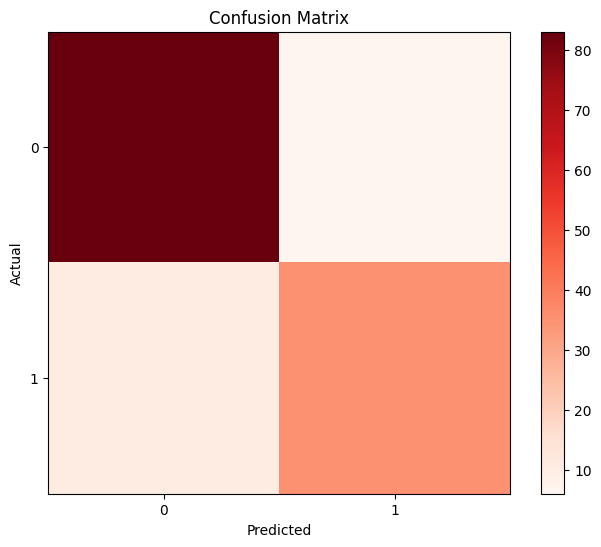

In [69]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, y_train_data, test_size=best_params_logreg2['test_size'], random_state=best_params_logreg2['random_state'])

# train the model
svm_classifier = SVC(kernel='poly', degree=best_degree)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)

# evaluate the performance of model
accuracy_polynomial_svm2 = accuracy_score(y_test, y_pred)
auc_polynomial_svm2 = roc_auc_score(y_test, y_pred)
recall_polynomial_svm2 = recall_score(y_test, y_pred)
cm_polynomial_svm2 = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy_polynomial_svm2)
print("AUC:", auc_polynomial_svm2)
print("Recall:", recall_polynomial_svm2)
print("Confusion Matrix:\n", cm_polynomial_svm2)

# plot of confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm_polynomial_svm2, interpolation='nearest', cmap='Reds')
plt.colorbar()
plt.xticks(np.arange(len(np.unique(y_test))), np.unique(y_test))
plt.yticks(np.arange(len(np.unique(y_test))), np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

As you can see, the model that has train-test together scored well. Other model is also good, but the first one is the best. Its parameters selected by the code we used before. Let's continue with our next <code>SVM</code> model.

### Gaussian SVM

For <code>Gaussian SVM</code>, we will test and make <code>GridSearchCV</code> for the best Gaussian parameters. Let's start.

In [70]:
# parameter intervals
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

# gridsearchcv
svm_classifier_gauss = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
svm_classifier_gauss.fit(X_train_scaled, y_train_data)

# print the best parameters
print("The best parameters:", svm_classifier_gauss.best_params_)

The best parameters: {'C': 1, 'gamma': 0.1}


Our best parameters are <code>'C' = 1</code> and <code>'gamma' = 0.1</code>. Let's use them on our model with test dataset.

Accuracy: 0.9521531100478469
AUC: 0.9468984962406015
Recall: 0.9276315789473685
Confusion Matrix:
 [[257   9]
 [ 11 141]]


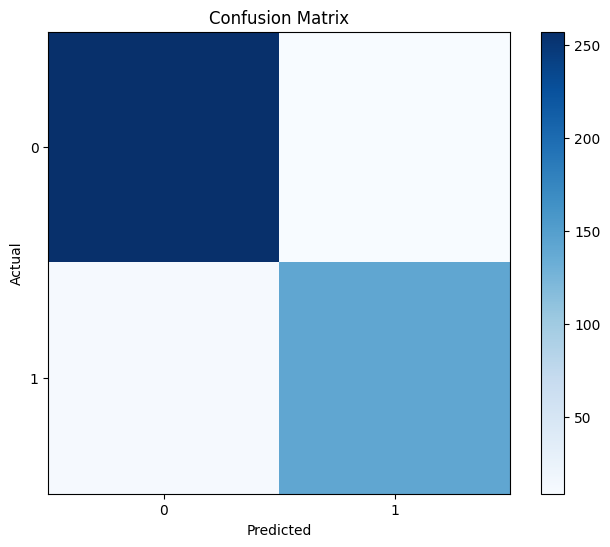

In [76]:
# train gauss svm
svm_classifier = SVC(kernel='rbf', C=svm_classifier_gauss.best_params_['C'], gamma=svm_classifier_gauss.best_params_['gamma'])
svm_classifier.fit(X_train_scaled, y_train_data)
y_pred = svm_classifier.predict(X_test_scaled)

# evaluate the performance of model
accuracy_gauss_svm1 = accuracy_score(y_submission, y_pred)
auc_gauss_svm1 = roc_auc_score(y_submission, y_pred)
recall_gauss_svm1 = recall_score(y_submission, y_pred)
cm_gauss_svm1 = confusion_matrix(y_submission, y_pred)

print("Accuracy:", accuracy_gauss_svm1)
print("AUC:", auc_gauss_svm1)
print("Recall:", recall_gauss_svm1)
print("Confusion Matrix:\n", cm_gauss_svm1)

# plot of confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm_gauss_svm1, interpolation='nearest', cmap='Blues')
plt.colorbar()
plt.xticks(np.arange(len(np.unique(y_submission))), np.unique(y_submission))
plt.yticks(np.arange(len(np.unique(y_submission))), np.unique(y_submission))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Let's use the best parameters for just our train dataset.

Accuracy: 0.8731343283582089
AUC: 0.8440699126092385
Recall: 0.7555555555555555
Confusion Matrix:
 [[83  6]
 [11 34]]


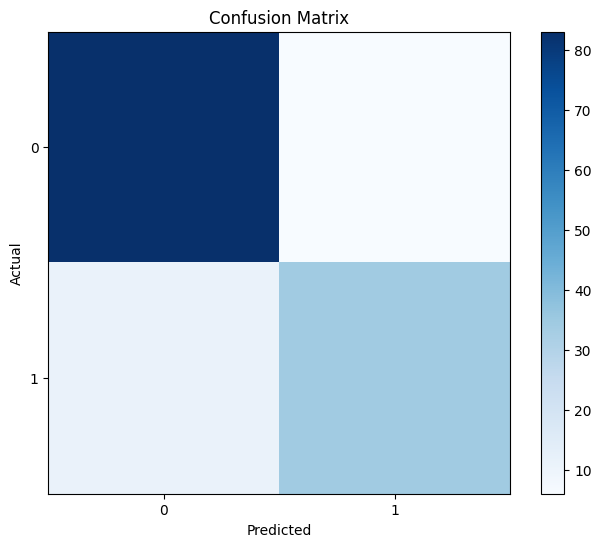

In [77]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, y_train_data, test_size=best_params_logreg2['test_size'], random_state=best_params_logreg2['random_state'])

# train gauss svm
svm_classifier = SVC(kernel='rbf', C=svm_classifier_gauss.best_params_['C'], gamma=svm_classifier_gauss.best_params_['gamma'])
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)

# evaluate the performance of model
accuracy_gauss_svm2 = accuracy_score(y_test, y_pred)
auc_gauss_svm2 = roc_auc_score(y_test, y_pred)
recall_gauss_svm2 = recall_score(y_test, y_pred)
cm_gauss_svm2 = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy_gauss_svm2)
print("AUC:", auc_gauss_svm2)
print("Recall:", recall_gauss_svm2)
print("Confusion Matrix:\n", cm_gauss_svm2)

# plot of confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm_gauss_svm2, interpolation='nearest', cmap='Blues')
plt.colorbar()
plt.xticks(np.arange(len(np.unique(y_test))), np.unique(y_test))
plt.yticks(np.arange(len(np.unique(y_test))), np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The model is powerful for our train-test dataset, but not good for the model with just train dataset. This part is end of our <code>SVM</code> section. Let's continue to <code>Decision Trees</code>.

## Decision Trees

First of all, let's get our imports.

In [78]:
# imports
from sklearn.tree import DecisionTreeClassifier

print('Success.')

Success.


Right now, let's find the best parameters for <code>Decision Tree</code> classifier with <code>GridSearchCV</code>.

In [84]:
# parameters interval
param_grid = {'max_depth': [None, 5, 10, 15, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# gridsearchcv
dt_classifier_dt = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
dt_classifier_dt.fit(X_train_scaled, y_train_data)

# the best parameters
print("The best parameters:", dt_classifier_dt.best_params_)

The best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}


Let's use there parameters to work with our train-test union dataset.

Accuracy: 0.8301435406698564
AUC: 0.7988721804511278
Recall: 0.6842105263157895
Confusion Matrix:
 [[243  23]
 [ 48 104]]


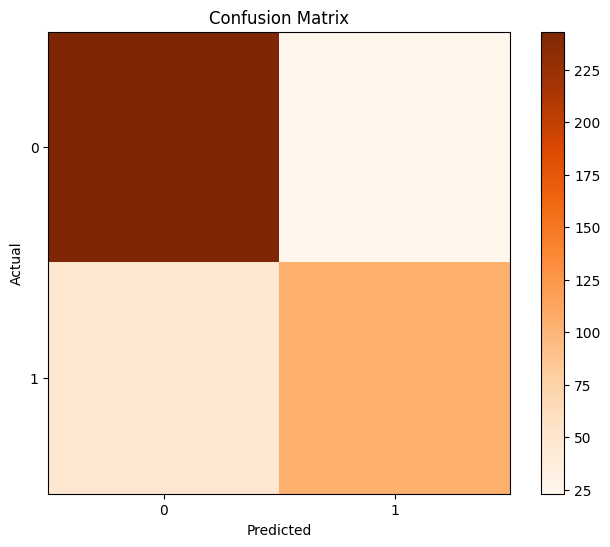

In [85]:
# train the model
dt_classifier = DecisionTreeClassifier(max_depth=dt_classifier_dt.best_params_['max_depth'], min_samples_leaf=dt_classifier_dt.best_params_['min_samples_leaf'], min_samples_split=dt_classifier_dt.best_params_['min_samples_split'])
dt_classifier.fit(X_train_scaled, y_train_data)
y_pred = dt_classifier.predict(X_test_scaled)

# evaluate the performance of model
accuracy_dt1 = accuracy_score(y_submission, y_pred)
auc_dt1 = roc_auc_score(y_submission, y_pred)
recall_dt1 = recall_score(y_submission, y_pred)
cm_dt1 = confusion_matrix(y_submission, y_pred)

print("Accuracy:", accuracy_dt1)
print("AUC:", auc_dt1)
print("Recall:", recall_dt1)
print("Confusion Matrix:\n", cm_dt1)

# plot of confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm_dt1, interpolation='nearest', cmap='Oranges')
plt.colorbar()
plt.xticks(np.arange(len(np.unique(y_submission))), np.unique(y_submission))
plt.yticks(np.arange(len(np.unique(y_submission))), np.unique(y_submission))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Let's work with just our train dataset.

Accuracy: 0.8656716417910447
AUC: 0.8329588014981275
Recall: 0.7333333333333333
Confusion Matrix:
 [[83  6]
 [12 33]]


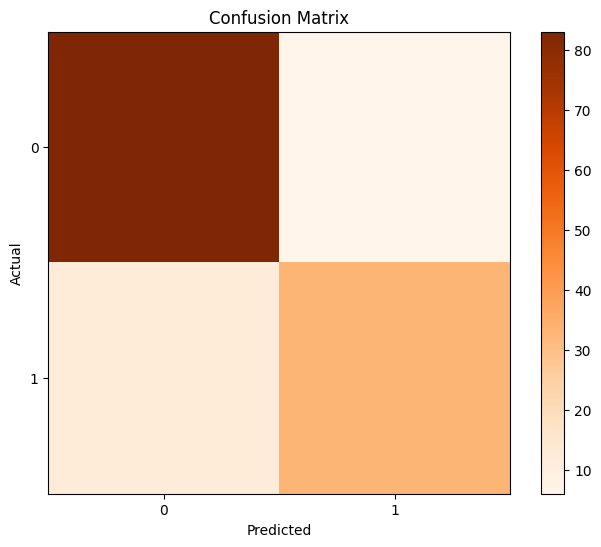

In [86]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, y_train_data, test_size=best_params_logreg2['test_size'], random_state=best_params_logreg2['random_state'])

# train the model
dt_classifier = DecisionTreeClassifier(max_depth=dt_classifier_dt.best_params_['max_depth'], min_samples_leaf=dt_classifier_dt.best_params_['min_samples_leaf'], min_samples_split=dt_classifier_dt.best_params_['min_samples_split'])
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)

# evaluate the model performance
accuracy_dt2 = accuracy_score(y_test, y_pred)
auc_dt2 = roc_auc_score(y_test, y_pred)
recall_dt2 = recall_score(y_test, y_pred)
cm_dt2 = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy_dt2)
print("AUC:", auc_dt2)
print("Recall:", recall_dt2)
print("Confusion Matrix:\n", cm_dt2)

# plot of confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm_dt2, interpolation='nearest', cmap='Oranges')
plt.colorbar()
plt.xticks(np.arange(len(np.unique(y_test))), np.unique(y_test))
plt.yticks(np.arange(len(np.unique(y_test))), np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Their accuracy rate is changing as you see, but the train-test union model is better if we talk about the means. Let's continue to the <code>Random Forest</code>

## Random Forest

In <code>Random Forest</code> classifier, we use the best parameters from our <code>Decision Tree</code>. From tree to forest, let's import required library first.

In [87]:
# imports
from sklearn.ensemble import RandomForestClassifier

print('Success.')

Success.


Let's train our model with the test dataset at first. We found the best parameters before, in <code>Decision Trees</code>. Use them here, because they are similar models to each other.

Accuracy: 0.8277511961722488
AUC: 0.8040413533834586
Recall 0.7171052631578947
Confusion Matrix:
 [[237  29]
 [ 43 109]]


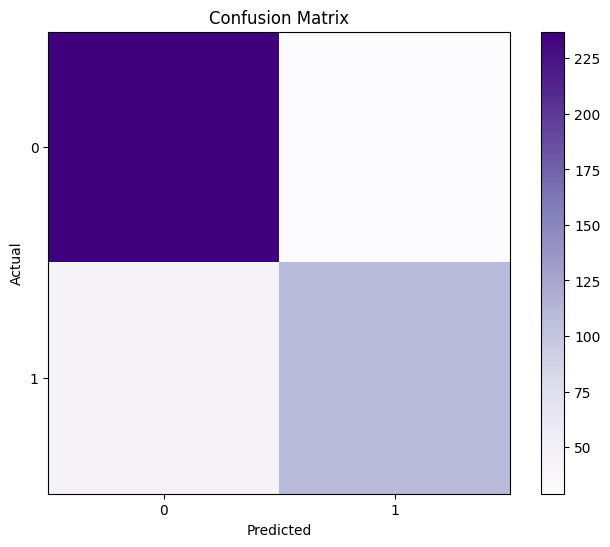

In [89]:
# create the model
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=dt_classifier_dt.best_params_['max_depth'], min_samples_leaf=dt_classifier_dt.best_params_['min_samples_leaf'], min_samples_split=dt_classifier_dt.best_params_['min_samples_split'])
rf_classifier.fit(X_train_scaled, y_train_data)
y_pred = rf_classifier.predict(X_test_scaled)

# evaluate the performance of model
accuracy_rf1 = accuracy_score(y_submission, y_pred)
auc_rf1 = roc_auc_score(y_submission, y_pred)
recall_rf1 = recall_score(y_submission, y_pred)
cm_rf1 = confusion_matrix(y_submission, y_pred)

print("Accuracy:", accuracy_rf1)
print("AUC:", auc_rf1)
print("Recall", recall_rf1)
print("Confusion Matrix:\n", cm_rf1)

# plot of confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm_rf1, interpolation='nearest', cmap='Purples')
plt.colorbar()
plt.xticks(np.arange(len(np.unique(y_submission))), np.unique(y_submission))
plt.yticks(np.arange(len(np.unique(y_submission))), np.unique(y_submission))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Right now, do the same thing the model below. It will use just train dataset. It will be splitted.

Accuracy: 0.8880597014925373
AUC: 0.8717852684144819
Recall 0.8222222222222222
Confusion Matrix:
 [[82  7]
 [ 8 37]]


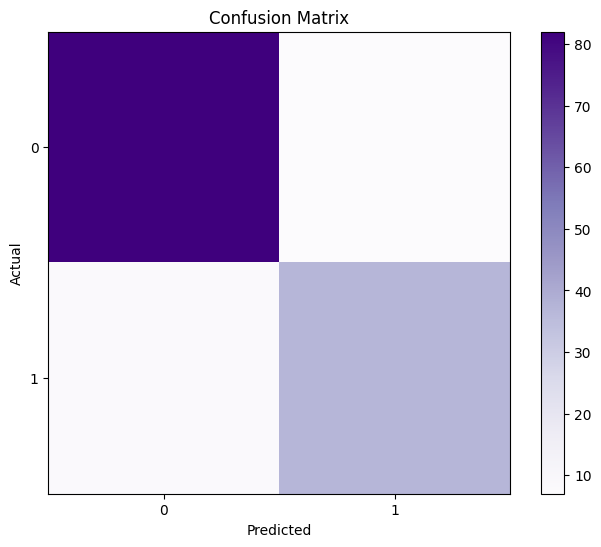

In [90]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, y_train_data, test_size=best_params_logreg2['test_size'], random_state=best_params_logreg2['random_state'])

# create random forest model
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=dt_classifier_dt.best_params_['max_depth'], min_samples_leaf=dt_classifier_dt.best_params_['min_samples_leaf'], min_samples_split=dt_classifier_dt.best_params_['min_samples_split'])
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

# evaluate the performance of model
accuracy_rf2 = accuracy_score(y_test, y_pred)
auc_rf2 = roc_auc_score(y_test, y_pred)
recall_rf2 = recall_score(y_test, y_pred)
cm_rf2 = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy_rf2)
print("AUC:", auc_rf2)
print("Recall", recall_rf2)
print("Confusion Matrix:\n", cm_rf2)

# plot of confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm_rf2, interpolation='nearest', cmap='Purples')
plt.colorbar()
plt.xticks(np.arange(len(np.unique(y_test))), np.unique(y_test))
plt.yticks(np.arange(len(np.unique(y_test))), np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

As you can see, these models have similar performance. If we get mean of the both of these model, you can see they are nearly the same. Let's continue with <code>AdaBoost</code>.

## AdaBoost

<code>AdaBoost</code> is also similar to <code>Decision Trees</code>, but different method like <code>Random Forest</code>. Let's start creating <code>AdaBoost</code> classifier with importing required library.

In [91]:
# imports
from sklearn.ensemble import AdaBoostClassifier

print('Success.')

Success.


In <code>AdaBoost</code>, we can use the same parameters with <code>Decision Tree</code> and <code>Random Forest</code> parameters, but it is good to use different parameters. Let's do it with <code>GridSearchCV</code>.

In [92]:
# adaboost
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0]
}

adaboost = AdaBoostClassifier()

# gridsearchcv
grid_search_adaboost = GridSearchCV(adaboost, param_grid, cv=5)
grid_search_adaboost.fit(X_train_scaled, y_train_data)

# the best parameters
best_params_adaboost = grid_search_adaboost.best_params_

print("The best parameters:", best_params_adaboost)

The best parameters: {'learning_rate': 1.0, 'n_estimators': 100}


Test it with our train-test dataset.

Accuracy: 0.9066985645933014
AUC: 0.9041353383458648
Recall 0.8947368421052632
Confusion Matrix:
 [[243  23]
 [ 16 136]]


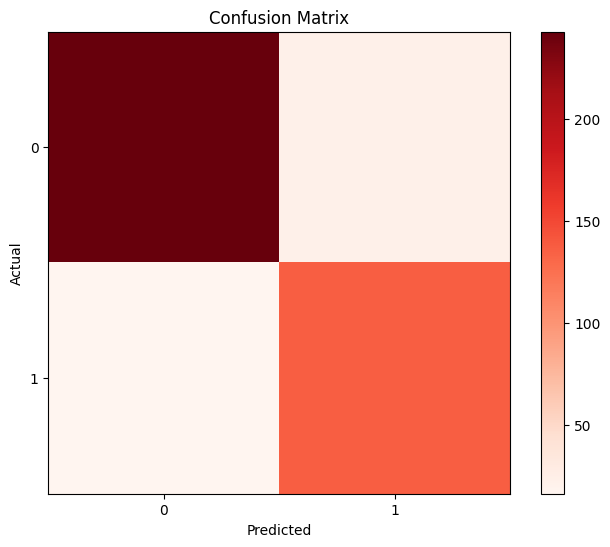

In [93]:
# train the model
best_adaboost = AdaBoostClassifier(**best_params_adaboost)
best_adaboost.fit(X_train_scaled, y_train_data)
y_pred = best_adaboost.predict(X_test_scaled)

# evaluate the performance of model
accuracy_adaboost1 = accuracy_score(y_submission, y_pred)
auc_adaboost1 = roc_auc_score(y_submission, y_pred)
recall_adaboost1 = recall_score(y_submission, y_pred)
cm_adaboost1 = confusion_matrix(y_submission, y_pred)

print("Accuracy:", accuracy_adaboost1)
print("AUC:", auc_adaboost1)
print("Recall", recall_adaboost1)
print("Confusion Matrix:\n", cm_adaboost1)

# plot of confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm_adaboost1, interpolation='nearest', cmap='Reds')
plt.colorbar()
plt.xticks(np.arange(len(np.unique(y_submission))), np.unique(y_submission))
plt.yticks(np.arange(len(np.unique(y_submission))), np.unique(y_submission))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Let's do it again just for train dataset.

Accuracy: 0.8805970149253731
AUC: 0.866167290886392
Recall 0.8222222222222222
Confusion Matrix:
 [[81  8]
 [ 8 37]]


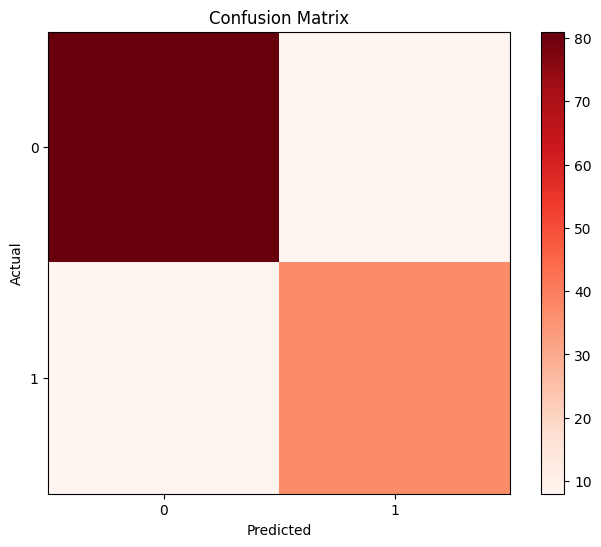

In [94]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, y_train_data, test_size=best_params_logreg2['test_size'], random_state=best_params_logreg2['random_state'])

# create the adaboost model
best_adaboost = AdaBoostClassifier(**best_params_adaboost)
best_adaboost.fit(X_train, y_train)
y_pred = best_adaboost.predict(X_test)

# evaluate the performance of model
accuracy_adaboost2 = accuracy_score(y_test, y_pred)
auc_adaboost2 = roc_auc_score(y_test, y_pred)
recall_adaboost2 = recall_score(y_test, y_pred)
cm_adaboost2 = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy_adaboost2)
print("AUC:", auc_adaboost2)
print("Recall", recall_adaboost2)
print("Confusion Matrix:\n", cm_adaboost2)

# plot of confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm_adaboost2, interpolation='nearest', cmap='Reds')
plt.colorbar()
plt.xticks(np.arange(len(np.unique(y_test))), np.unique(y_test))
plt.yticks(np.arange(len(np.unique(y_test))), np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

As you can see, our model with train-test dataset is the best model for <code>AdaBoost</code> classifier.

Right now, we are done with our models. Let's continue with our <code>comparison</code> part.

## Comparison

We are done with our models right now. We create every model with their own parameters, we created two classifiers also. In every model, we create one classifier that works with train-test data together, and second one is the one that just works with our train dataset. It uses <code>train_test_split</code> to do it.

Right now, we will compare our classifiers. We use <code>accuracy</code> and <code>AUC</code> scores to do it.

Let's start with our train-test dataset models.

We imported <code>matplotlib.pyplot</code> before, so we can start.

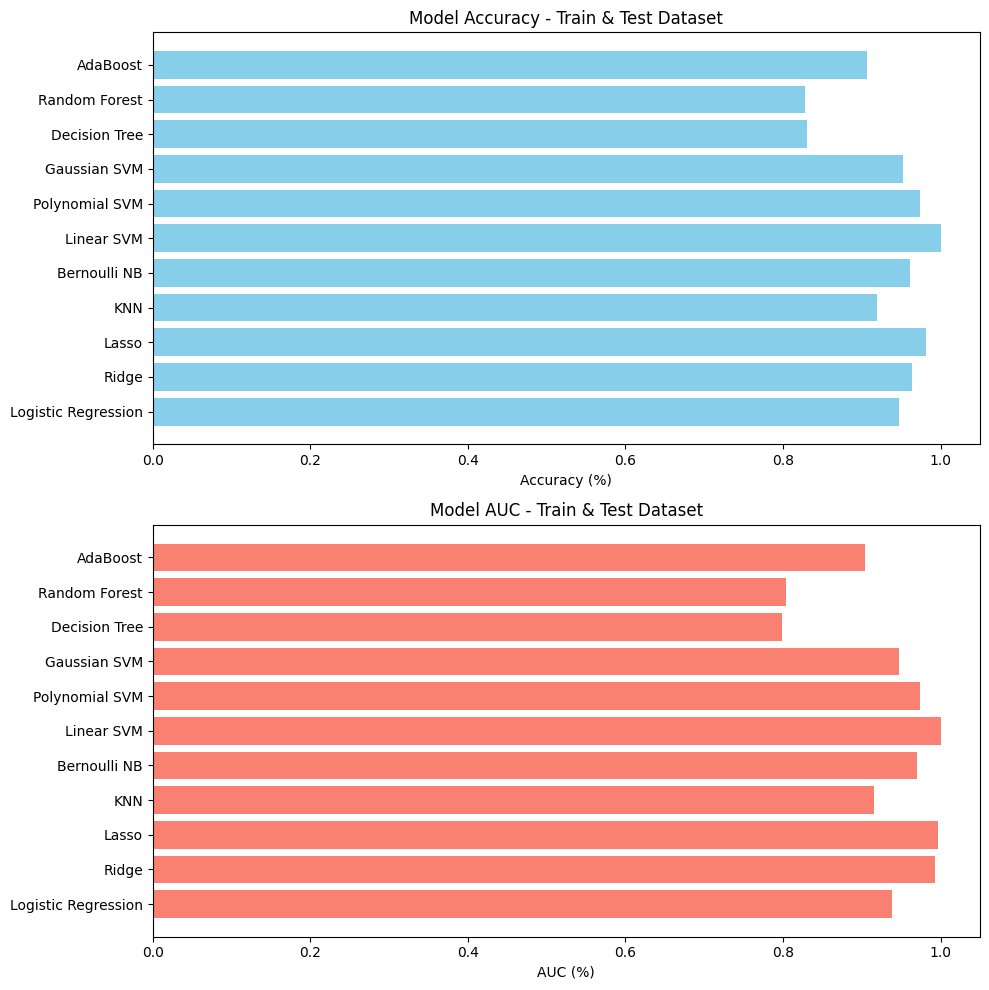

In [96]:
# models and results
models = ['Logistic Regression', 'Ridge', 'Lasso', 'KNN', 'Bernoulli NB', 
          'Linear SVM', 'Polynomial SVM', 'Gaussian SVM', 'Decision Tree', 
          'Random Forest', 'AdaBoost']
accuracy = [accuracy_logreg1, accuracy_ridge1, accuracy_lasso1, accuracy_knn1, accuracy_bayes1, accuracy_linear_svm1, accuracy_polynomial_svm1, accuracy_gauss_svm1, accuracy_dt1, accuracy_rf1, accuracy_adaboost1]
auc = [auc_logreg1, auc_ridge1, auc_lasso1, auc_knn1, auc_bayes1, auc_linear_svm1, auc_polynomial_svm1, auc_gauss_svm1, auc_dt1, auc_rf1, auc_adaboost1]

# plot
plt.figure(figsize=(10, 10))

# accuracy
plt.subplot(2, 1, 1)
plt.barh(models, accuracy, color='skyblue')
plt.xlabel('Accuracy (%)')
plt.title('Model Accuracy - Train & Test Dataset')

# auc
plt.subplot(2, 1, 2)
plt.barh(models, auc, color='salmon')
plt.xlabel('AUC (%)')
plt.title('Model AUC - Train & Test Dataset')

plt.tight_layout()
plt.show()

As you can see, the best one is <code>Linear SVM</code> model here. Its accuracy and AUC score is the best. So for this section, we can say it is the best one.

Right now, we will do the same thing for our <code>just-train dataset</code> models. Let's start.

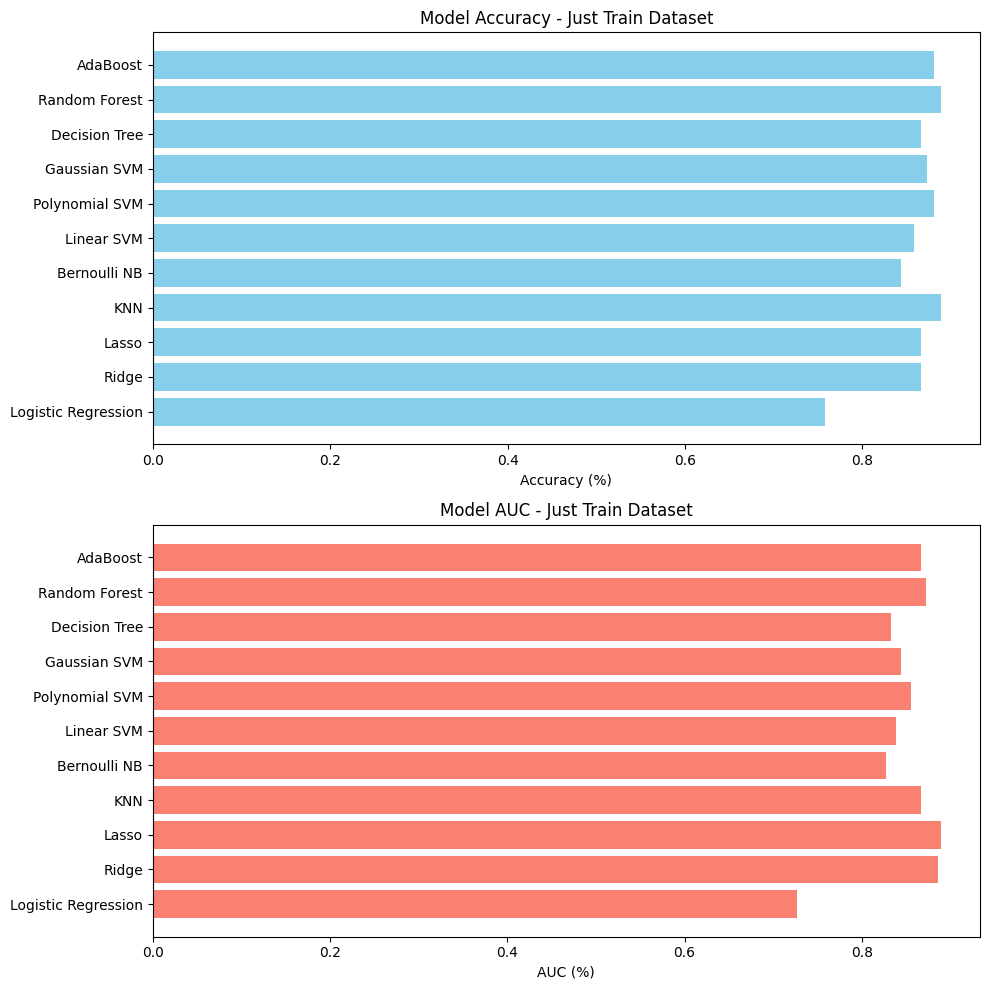

In [97]:
# models and results
models = ['Logistic Regression', 'Ridge', 'Lasso', 'KNN', 'Bernoulli NB', 
          'Linear SVM', 'Polynomial SVM', 'Gaussian SVM', 'Decision Tree', 
          'Random Forest', 'AdaBoost']
accuracy = [accuracy_logreg2, accuracy_ridge2, accuracy_lasso2, accuracy_knn2, accuracy_bayes2, accuracy_linear_svm2, accuracy_polynomial_svm2, accuracy_gauss_svm2, accuracy_dt2, accuracy_rf2, accuracy_adaboost2]
auc = [auc_logreg2, auc_ridge2, auc_lasso2, auc_knn2, auc_bayes2, auc_linear_svm2, auc_polynomial_svm2, auc_gauss_svm2, auc_dt2, auc_rf2, auc_adaboost2]

# plot
plt.figure(figsize=(10, 10))

# accuracy
plt.subplot(2, 1, 1)
plt.barh(models, accuracy, color='skyblue')
plt.xlabel('Accuracy (%)')
plt.title('Model Accuracy - Just Train Dataset')

# auc
plt.subplot(2, 1, 2)
plt.barh(models, auc, color='salmon')
plt.xlabel('AUC (%)')
plt.title('Model AUC - Just Train Dataset')

plt.tight_layout()
plt.show()

For here, you can see <code>Random Forest</code> is the best model. It show the best performance if we see together its accuracy and AUC score.

But the best model of this project is <code>Linear SVM</code> from our train-test dataset models. It has more train dataset than our just-train dataset models. So, it is normal.

So, you reached the bottom part of this project. We trained lots of models. Every model has <code>train-test</code> and <code>just-train</code> dataset models. In the end, we compared them and selected the best one.

## Author

### Mert Kont